In [6]:
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
folder_path = '/Users/havvadogan/Desktop/ML/Sound_folder'
metadata = pd.read_csv('/Users/havvadogan/Desktop/ML/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    # Zero-Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(audio)[0]

    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)[0]

    # Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)

    # Spectral Rolloff
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)[0]

    # Mel-frequency Cepstral Coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

    # Chroma Feature
    chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)

    # Create a dictionary to store features
    feature_dict = {
        'Zero-Crossing Rate': np.mean(zcr),
        'Spectral Centroid': np.mean(spectral_centroid),
        'Spectral Rolloff': np.mean(spectral_rolloff)
    }

    # Add Spectral Contrast features
    for i, value in enumerate(spectral_contrast):
        feature_dict[f'Spectral Contrast {i}'] = np.mean(value)

    # Add MFCC features
    for i, value in enumerate(mfccs):
        feature_dict[f'MFCC {i}'] = np.mean(value)

    # Add Chroma features
    for i, value in enumerate(chroma):
        feature_dict[f'Chroma {i}'] = np.mean(value)

    return feature_dict



In [9]:
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(folder_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    final_class_labels = row['class']
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])



66it [00:05, 12.29it/s]/Users/havvadogan/anaconda3/lib/python3.10/site-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
3554it [04:47, 12.39it/s]/Users/havvadogan/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [10:53, 18.34it/s]/Users/havvadogan/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/havvadogan/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [11:23, 12.77it/s]


In [25]:
# Convert extracted features list to DataFrame
feature_names = extracted_features[0][0].keys()
features_data = [item[0] for item in extracted_features]
class_labels = [item[1] for item in extracted_features]
extracted_features_df = pd.DataFrame(features_data, columns=feature_names)
extracted_features_df['class'] = class_labels

In [31]:
extracted_features_df.to_csv('extracted_features.csv', index=False)

In [32]:
from IPython.display import FileLink, display

In [34]:
display(FileLink('extracted_features.csv'))

/Users/havvadogan/extracted_features.csv

In [13]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [10]:
extracted_features_df = pd.read_csv('/Users/havvadogan/Desktop/ML/extracted_features.csv')

In [11]:
from sklearn import decomposition, ensemble, datasets, linear_model
X = extracted_features_df.drop('class', axis=1)
y = extracted_features_df['class']
y = (extracted_features_df["class"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = decomposition.PCA(n_components = 2)
X_train_vis = pca.fit_transform(X_train)

X_train_vis.shape

(6985, 2)

(6985,) (6985,)


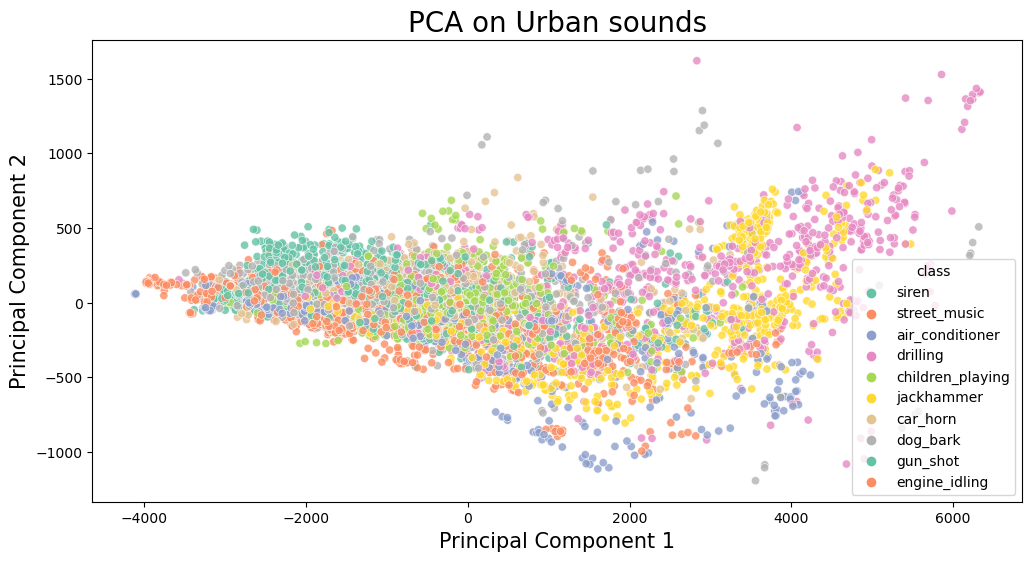

In [14]:
fig = plt.figure(figsize=(12 ,6))

pc1 = X_train_vis[:,0]
pc2 = X_train_vis[:,1]

plt.title('PCA on Urban sounds', fontsize = 20)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

print(pc1.shape, pc2.shape)
# plt.scatter(pc1, pc2)

sns.scatterplot(x=pc1, y=pc2, alpha=0.8, palette="Set2", hue = y_train)

plt.show()